In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.cluster import homogeneity_score
import sklearn.cluster as cluster
from sklearn import metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, adjusted_rand_score, mutual_info_score, homogeneity_score, davies_bouldin_score, v_measure_score, completeness_score

def purity_score(y_true, y_pred):
    contingency_matrix=metrics.cluster.contingency_matrix(y_true,y_pred)
    return np.sum(np.amax(contingency_matrix,axis=0))/np.sum(contingency_matrix)

In [26]:
data_set=2

if data_set==1:
   #simulated
    size=200
    dimension=100
    clusters=5
    data_set=[]
    for i in range(size):
        for k in range(clusters):
            mn=(2+k)*np.ones(dimension)
            arr=.1*np.ones(dimension)
            cov=np.diag(arr)
            x=np.random.multivariate_normal(mn, cov, 1)
            temp=x[0].tolist()
            temp.append(k)
            data_set.append(temp)

    df=pd.DataFrame(data=data_set)  
    y=df[dimension]
    X=df.drop(dimension,axis=1)

elif data_set==2:
     #titanic
    df=pd.read_csv("dataSets/titanic.csv")
    del df["PassengerId"]
    del df["Name"]
    del df["Ticket"]
    del df["Cabin"]
    df['Sex']=df['Sex'].replace(to_replace='male',value='1')
    df['Sex']=df['Sex'].replace(to_replace='female',value='0')
    df['Embarked']=df['Embarked'].replace(to_replace='S',value='0')
    df['Embarked']=df['Embarked'].replace(to_replace='C',value='1')
    df['Embarked']=df['Embarked'].replace(to_replace='Q',value='2')
    #now with extraneous columns deleted and categorical data data converted to integers, I'll delete all rows with corrupting NaN values
    df=df.dropna()
    df.head()
    y=df['Survived']
    X=df.drop('Survived',axis=1)
elif data_set==3:
    #diabetes
    df=pd.read_csv("dataSets/diabetes.csv")
    zero_to_nan=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    for col in zero_to_nan:
            df[col]=df[col].replace(0,np.NaN)
            mean=int(df[col].mean(skipna=True))
            df[col]=df[col].replace(np.NaN,mean)
            X=df.drop('Outcome',axis=1)
            y=df['Outcome']

mms = MinMaxScaler()
mms.fit(X)
scaled_data =mms.transform(X)    

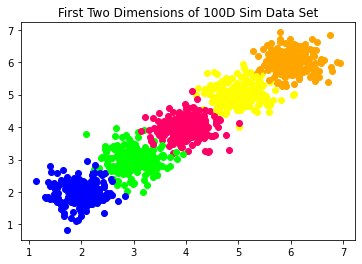

In [231]:
#use only when 1 is selected above
colors=["#0000FF", "#00FF00", "#FF0066",'yellow','orange']
fig = plt.figure()
ax = fig.add_subplot()
for i in range(len(scaled_data)):
    ind=i%(dimension-1)
    ax.scatter(df[0][i], df[1][i], color=colors[df[dimension][i]])

plt.title('First Two Dimensions of 100D Sim Data Set')    
plt.show()

In [27]:
ari=[]
SSD = []
sil_score=[]
mi=[]
homo=[]
comp=[]
v=[]
davies=[]
clusters=range(2,20)

#X=scaled_data
for c in clusters:
    km = KMeans(n_clusters=c)
    km = km.fit(scaled_data)
    SSD.append(km.inertia_)
    
    labels=cluster.KMeans(n_clusters=c).fit(X).labels_
    sil_score.append(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=100))
    
    pred = km.predict(scaled_data)
    ari.append(adjusted_rand_score(y, pred))
    mi.append(mutual_info_score(y,pred))
    homo.append(homogeneity_score(y,pred))
    comp.append(completeness_score(y,pred))
    v.append(v_measure_score(y,pred))            
    davies.append(davies_bouldin_score(scaled_data, labels))

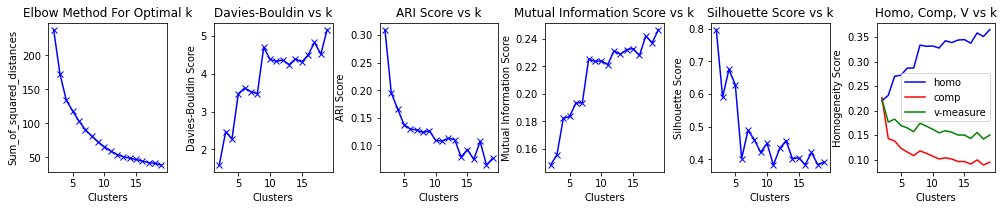

In [28]:


plt.subplots(figsize=(14, 3))

plt.subplot(1, 6, 1) # row 1, col 2 index 1
plt.plot(clusters, SSD, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

plt.subplot(1, 6, 2) # index 2
plt.plot(clusters, davies, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin vs k')
plt.tight_layout(pad=1.0)


plt.subplot(1, 6, 3) # row 1, col 2 index 1
plt.plot(clusters, ari, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('ARI Score')
plt.title('ARI Score vs k')

 
plt.subplot(1, 6, 4) # index 2
plt.plot(clusters, mi, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score vs k')

plt.subplot(1, 6, 5) # index 2
plt.plot(clusters, sil_score, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')  

plt.subplot(1, 6, 6) # index 2
plt.plot(clusters, homo,color='blue')
plt.plot(clusters, comp, 'red')
plt.plot(clusters,v, color='green')
plt.xlabel('Clusters')
plt.ylabel('Homogeneity Score')
plt.title('Homo, Comp, V vs k')
plt.legend(["homo" , "comp","v-measure"])

plt.show() 



In [258]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)
labels = kmeans.predict(scaled_data)
print(purity_score(y,labels))


0.68359375


In [ ]:
purity=[1.0,.78,.68]